In [260]:
import numpy as np
import pandas as pd

# Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

# Make Matplotlib plots appear inline
%matplotlib inline

from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh
# bokeh.io.output_notebook()

In [15]:
import Bio

In [18]:
# import biopython stuff 
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
#from Bio import SearchIO

In [38]:
#import data
df = pd.read_csv('constit_read1.csv', comment='#')
# df['impact force (mN)'] = df['impact force (mN)'].astype(np.float64) 
# for changing type of data

In [20]:
#check this sheet has unique sequences (expected)
unique_hits = df['sequence'].unique()
len(unique_hits), len(df['sequence'])

(2759, 2759)

In [49]:
#go through and delete first base to start @ correct reading frame for CRY
df0 = pd.read_csv('constit_read1.csv', comment='#')
df = df0.copy()

for index in df.index:
    df['sequence'][index] = df['sequence'][index][1:]

df0['sequence'][0], df['sequence'][0] # pre, post (check it worked)

<ipython-input-49-60ce2f0a0e49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sequence'][index] = df['sequence'][index][1:]


('GAGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCAAGGCCTGGAGACAAGGCAGGACCGGTTATCCGTTGGTGGATGCCGGAATGAGAGAGCTTTGGGCTACCGGATGGATGCATAACAGAATAAGAGTGATTGTTT',
 'AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCAAGGCCTGGAGACAAGGCAGGACCGGTTATCCGTTGGTGGATGCCGGAATGAGAGAGCTTTGGGCTACCGGATGGATGCATAACAGAATAAGAGTGATTGTTT')

In [56]:
# We want to translate each sequence and append translated column to dataframe
# First, test one and make sure it's translated correctly.
seq0 = Seq(df['sequence'][0])
print(seq0.translate())

SHLRFFPWDADVDKFKAWRQGRTGYPLVDAGMRELWATGWMHNRIRVIV


In [55]:
# translate full CRY2(535) sequence to make sure the subregion was translated correctly
CRY2535 = Seq("atgaagatggacaaaaagactatagtttggtttagaagagacctaaggattgaggataatcctgcattagcagcagctgctcacgaaggatctgtttttcctgtcttcatttggtgtcctgaagaagaaggacagttttatcctggaagagcttcaagatggtggatgaaacaatcacttgctcacttatctcaatccttgaaggctcttggatctgacctcactttaatcaaaacccacaacacgatttcagcgatcttggattgtatccgcgttaccggtgctacaaaagtcgtctttaaccacctctatgatcctgtttcgttagttcgggaccataccgtaaaggagaagctggtggaacgtgggatctctgtgcaaagctacaatggagatctattgtatgaaccgtgggagatatactgcgaaaagggcaaaccttttacgagtttcaattcttactggaagaaatgcttagatatgtcgattgaatccgttatgcttcctcctccttggcggttgatgccaataactgcagcggctgaagcgatttgggcgtgttcgattgaagaactagggctggagaatgaggccgagaaaccgagcaatgcgttgttaactagagcttggtctccaggatggagcaatgctgataagttactaaatgagttcatcgagaagcagttgatagattatgcaaagaacagcaagaaagttgttgggaattctacttcactactttctccgtatctccatttcggggaaataagcgtcagacacgttttccagtgtgcccggatgaaacaaattatatgggcaagagataagaacagtgaaggagaagaaagtgcagatctttttcttaggggaatcggtttaagagagtattctcggtatatatgtttcaacttcccgtttactcacgagcaatcgttgttgagtcatcttcggtttttcccttgggatgctgatgttgataagttcaaggcctggagacaaggcaggaccggttatccgttggtggatgccggaatgagagagctttgggctaccggatggatgcataacagaataagagtgattgtttcaagctttgctgtgaagtttcttctccttccatggaaatggggaatgaagtatttctgggatacacttttggatgctgatttggaatgtgacatccttggctggcagtatatctctgggagtatccccgatggccacgagcttgatcgcttggacaatcccgcgttacaaggcgccaaatatgacccagaaggtgagtacataaggcaatggcttcccgagcttgcgagattgccaactgaatggatccatcatccatgggacgctcctttaaccgtactcaaagcttctggtgtggaactcggaacaaactatgcgaaacccattgtagacatcgacacagctcgtgagctactagctaaagctatttcaagaacccgtgaagcacagatcatgatcggagcagcacctgatgagattgtagcagatagcttcgaggccttaggggctaataccattaaagaacctggtctttgcccatctgtgtcttctaatgaccaacaagtaccttcggctgtttga")
print(CRY2535.translate())

MKMDKKTIVWFRRDLRIEDNPALAAAAHEGSVFPVFIWCPEEEGQFYPGRASRWWMKQSLAHLSQSLKALGSDLTLIKTHNTISAILDCIRVTGATKVVFNHLYDPVSLVRDHTVKEKLVERGISVQSYNGDLLYEPWEIYCEKGKPFTSFNSYWKKCLDMSIESVMLPPPWRLMPITAAAEAIWACSIEELGLENEAEKPSNALLTRAWSPGWSNADKLLNEFIEKQLIDYAKNSKKVVGNSTSLLSPYLHFGEISVRHVFQCARMKQIIWARDKNSEGEESADLFLRGIGLREYSRYICFNFPFTHEQSLLSHLRFFPWDADVDKFKAWRQGRTGYPLVDAGMRELWATGWMHNRIRVIVSSFAVKFLLLPWKWGMKYFWDTLLDADLECDILGWQYISGSIPDGHELDRLDNPALQGAKYDPEGEYIRQWLPELARLPTEWIHHPWDAPLTVLKASGVELGTNYAKPIVDIDTARELLAKAISRTREAQIMIGAAPDEIVADSFEALGANTIKEPGLCPSVSSNDQQVPSAV*


CRY2(535) translated above lines up correctly with the translated mutagenized region, so now let's go through and translate all sequences and put the translated sequences in the dataframe.

In [84]:
df_aa = df.copy()

# Declare a list that is to be converted into a column 
aa_seqs = []
for index in df_aa.index:
    translated = Seq(df_aa['sequence'][index]).translate()
    aa_seqs.insert(index, translated)
df_aa['aa_seq'] = aa_seqs # use 'aa_seq' as the column name and equate it to the list we just added to

#first amino acid goes in another column to delete read 2 columns
first = []
for index in df_aa.index:
    aa1 = df_aa['aa_seq'][index][0]
    first.insert(index, aa1)
df_aa['first_aa'] = first

df_aa.head()

C:\Users\Sarah\anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,sequence,value,aa_seq,first_aa
0,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,6.646,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
1,GTCCAAGCGATCAAGCTCGTGGCCATCGGGGATACTCCCAGAGATA...,5.066,"(V, Q, A, I, K, L, V, A, I, G, D, T, P, R, D, ...",V
2,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,2.039,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
3,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,1.408,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
4,GTCCAAGCGATCAAGCTCGTGGCCATCGGGGATACTCCCAGAGATA...,0.690,"(V, Q, A, I, K, L, V, A, I, G, D, T, P, R, D, ...",V


This has both (SHL sequences are forward primer and VQA are representative of reverse primer...we need reverse complement of these actually)
Let's look at  forward primer examples only for now (150 bp mutagentized region 1 only) by selecting only those beginning with SH...

In [198]:
df_r1 = df_aa.copy()
df_r1.drop(df_r1.index[df_r1['first_aa'] != 'S'], inplace = True)    
df_r1[0:10]

,sequence,value,aa_seq,first_aa
0,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,6.646,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
2,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,2.039,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
3,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,1.408,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
5,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.430,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
13,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.180,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
15,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.163,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
21,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.126,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
24,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.118,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
25,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.118,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
27,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.109,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S


Now let's define the reference sequence we want to compare these to...

In [199]:
df_final = df_r1.copy()
df_final = df_final.reset_index(drop=True)

In [151]:
refseq = Seq("agtcatcttcggtttttcccttgggatgctgatgttgataagttcaaggcctggagacaaggcaggaccggttatccgttggtggatgccggaatgagagagctttgggctaccggatggatgcataacagaataagagtgattgtttcaagctttgctgtgaagtttcttctccttccatggaaatggggaatgaagtatttctgggatacacttttggatgctgatttggaatgtgacatccttggctggcagtatatctctgggagtatccccgatggccacgagcttgatcgcttggac")

In [152]:
len(refseq.translate())

101

In [153]:
len(df_final['aa_seq'][1])

49

Our the mutagenized region is ~<101 amino acids, and our reads in the dataframe (forward read 1s) are 49 amino acids. Let's crop the reference sequence to reflect this.

In [154]:
refseq1 = Seq("agtcatcttcggtttttcccttgggatgctgatgttgataagttcaaggcctggagacaaggcaggaccggttatccgttggtggatgccggaatgagagagctttgggctaccggatggatgcataacagaataagagtgattgtttc")

In [155]:
refseq1.translate(), len(refseq1.translate())
ref_aa_seq = refseq1.translate()
ref_aa_seq[0]

C:\Users\Sarah\anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


'S'

Looks good! Now we will align the data to the reference sequence.

In [135]:
from Bio import Align
aligner = Align.PairwiseAligner()
from Bio import AlignIO

In [159]:
df_final['aa_seq'][0:10]

0    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
1    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
2    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
3    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
4    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
5    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
6    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
7    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
8    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
9    (S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...
Name: aa_seq, dtype: object

In [200]:
for index in df_final.index:
    for i in range(0, len(ref_aa_seq)):
        refaa = ref_aa_seq[i]
        r1aa = df_final['aa_seq'][index][i]
        if refaa != r1aa:
            print(r1aa, index, i+1)
            # which amino acid, which read, which amino acid position
            
# NOTE: There are some sequences that are no good in here. Let's filter them out. 
# **If there are more than 3 codon mutations, it's probably useless sequence**

F 1 35
S 2 21
S 3 21
F 3 35
G 5 44
M 6 27
L 8 45
R 9 42
P 10 38
V 11 11
D 12 43
S 13 44
V 16 41
R 18 20
G 19 19
S 20 43
G 21 40
L 22 32
V 23 45
S 24 48
R 25 16
E 27 47
A 28 49
R 29 8
G 30 13
R 33 36
M 34 45
W 37 22
M 44 16
S 48 19
E 49 11
L 50 20
S 52 2
S 52 3
V 52 4
P 52 6
L 52 7
G 52 8
C 52 9
* 52 10
C 52 11
* 52 12
* 52 13
V 52 14
Q 52 15
G 52 16
L 52 17
E 52 18
T 52 19
R 52 20
Q 52 21
D 52 22
R 52 23
L 52 24
S 52 25
V 52 26
G 52 27
G 52 28
C 52 29
R 52 30
N 52 31
E 52 32
A 52 34
G 52 36
Y 52 37
R 52 38
M 52 39
D 52 40
A 52 41
* 52 42
Q 52 43
N 52 44
K 52 45
S 52 46
D 52 47
C 52 48
F 52 49
R 53 14
A 55 47
A 57 12
G 58 9
E 59 9
H 60 20
G 61 46
R 62 16
R 62 20
R 62 36
R 63 8
S 65 21
S 66 21
G 66 44
M 68 14
L 69 7
F 69 8
P 69 9
P 69 10
I 69 11
L 69 12
S 69 13
H 69 14
I 69 15
A 69 16
C 69 17
K 69 18
I 69 20
V 69 21
S 69 22
P 69 23
L 69 24
P 69 25
* 69 26
R 69 27
A 69 28
A 69 29
G 69 30
K 69 31
S 69 32
L 69 33
F 69 34
P 69 35
G 69 36
S 69 37
G 69 38
C 69 39
G 69 40
G 69 41
A 69 42
L 69 4

#### NOTE: There are some sequences that are no good in here. Let's filter them out. 
#### If there are more than 3 codon changes, we will assume it's probably a bad read that we can toss.

#### We'll make a pandas dataframe with only the useful data for plotting and analysis.

In [296]:
df_final.head()

,sequence,value,aa_seq,first_aa
0,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,6.646,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
1,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,2.039,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
2,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,1.408,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
3,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.430,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S
4,AGTCATCTTCGGTTTTTCCCTTGGGATGCTGATGTTGATAAGTTCA...,0.180,"(S, H, L, R, F, F, P, W, D, A, D, V, D, K, F, ...",S


In [295]:
data = []

for index in df_final.index:
    for i in range(0, len(ref_aa_seq)):
        refaa = ref_aa_seq[i]
        r1aa = df_final['aa_seq'][index][i]
        percent = df_final['value'][index]
        if refaa != r1aa:
            mutation_info = [index, refaa, r1aa, i, percent]
            data.append(mutation_info)
        
df_mutations = pd.DataFrame(data, columns = ['read_number', 'original_aa', 'mutated_aa', 'position', 'percent'])
df_mutations.head()

,read_number,original_aa,mutated_aa,position,percent
0,1,L,F,34,2.039
1,2,G,S,20,1.408
2,3,G,S,20,0.430
3,3,L,F,34,0.430
4,5,R,G,43,0.163


### This shows us that the sequence with value 6% was just the wild-type sequence.

In [297]:
# Now that we have the dataframe, filter the data.
df_filtered = df_mutations.copy()

for val in df_filtered.read_number.unique():
    # go through each read and ask how many codon mutations are in the sequence
    num_of_muts = len(df_filtered[df_filtered['read_number'] == val])
    #print(index, num_of_muts)
    if num_of_muts > 3: # if there are more than 3, it's probably no good, so delete it
        df_filtered = df_filtered[df_filtered.read_number != val]

Let's look at the table. First thing we can do is plot the frequency of mutations at a given position.

In [298]:
df_filtered.head()

,read_number,original_aa,mutated_aa,position,percent
0,1,L,F,34,2.039
1,2,G,S,20,1.408
2,3,G,S,20,0.430
3,3,L,F,34,0.430
4,5,R,G,43,0.163


### Now make a table of single mutants only.

In [299]:
df_single = df_filtered.copy()

# don't just go through by index. Go through by list of unique values in "read_number"
for val in df_single.read_number.unique(): #this makes a list of unique vals in this column
    # go through each read and ask how many codon mutations are in the sequence
    num_of_muts = len(df_single[df_single['read_number'] == val])
    #print(index, num_of_muts)
    if num_of_muts > 1: # if there are more than 1, don't put it in the single mutants table
        df_single = df_single[df_single.read_number != val] # cuts out those with read_number = val

In [300]:
df_single.head()

,read_number,original_aa,mutated_aa,position,percent
0,1,L,F,34,2.039
1,2,G,S,20,1.408
4,5,R,G,43,0.163
5,6,L,M,26,0.126
6,8,I,L,44,0.118


### Now make a table of double mutants only.

In [301]:
df_double = df_filtered.copy()

for val in df_double.read_number.unique():
    # go through each read and ask how many codon mutations are in the sequence
    num_of_muts = len(df_double[df_double['read_number'] == val])
    #print(index, num_of_muts)
    if num_of_muts != 2: # if there are not exactly 2 mutations, don't put in the double mutant table
        df_double = df_double[df_double.read_number != val]

In [302]:
df_double.head()

,read_number,original_aa,mutated_aa,position,percent
2,3,G,S,20,0.430
3,3,L,F,34,0.430
89,66,G,S,20,0.034
90,66,R,G,43,0.034
134,70,L,F,34,0.032


### Now make a table of triple mutants only.

In [303]:
df_triple = df_filtered.copy()

for val in df_triple.read_number.unique():
    # go through each read and ask how many codon mutations are in the sequence
    num_of_muts = len(df_triple[df_triple['read_number'] == val])
    #print(index, num_of_muts)
    if num_of_muts != 3: # if there are not exactly 2 mutations, don't put in the double mutant table
        df_triple = df_triple[df_triple.read_number != val]

In [304]:
df_triple.head()

,read_number,original_aa,mutated_aa,position,percent
84,62,K,R,15,0.037
85,62,Q,R,19,0.037
86,62,W,R,35,0.037
544,183,W,R,35,0.010
545,183,T,S,37,0.010


## Now, look at distribution of single mutants only. This plot isn't weighted by percent--ignore.

In [332]:
# change indexing to match CRY2
df_single_indexed = df_single.copy()
for index in df_single_indexed.index:
    new_index = df_single_indexed['position'][index] + 314
    df_single_indexed['position'][index] = new_index

<ipython-input-332-a7ca5fbb3e61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_indexed['position'][index] = new_index


## Plotting relative frequency of single mutants (weighted properly by percent).

Text(0.5, 1.0, 'Frequency of Single mutations in CRY2(535) Consitutive Screen from read1')

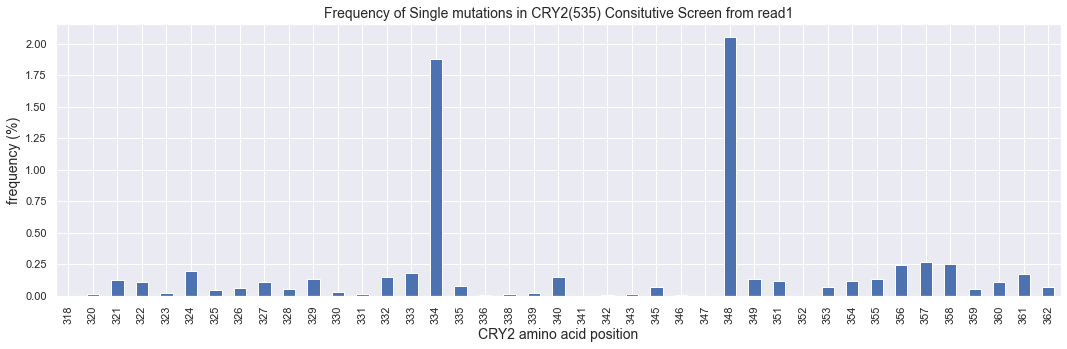

In [331]:
df_single_indexed.groupby('position')['percent'].sum().plot.bar(figsize=(18,5))
plt.ylabel("frequency (%)")
plt.xlabel("CRY2 amino acid position")
plt.title("Frequency of Single mutations in CRY2(535) Consitutive Screen from read1")

#### Can also look at these single mutants normalized to the most frequent value.

<AxesSubplot:xlabel='position'>

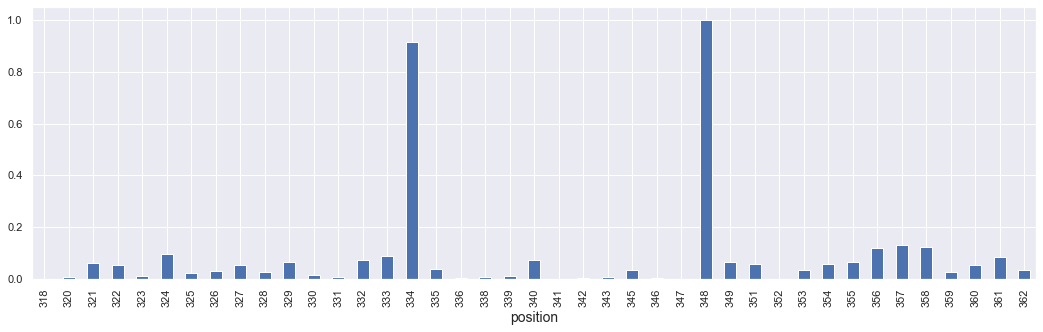

In [330]:
max_val = max(df_single_indexed.groupby('position')['percent'].sum())

norm_data = df_single_indexed.groupby('position')['percent'].sum()/max_val
norm_data.plot.bar(figsize=(18,5))

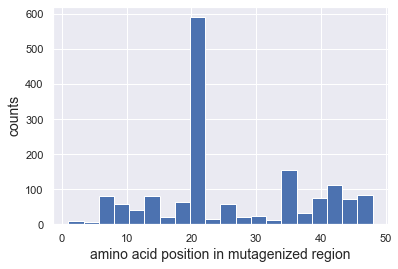

In [210]:
# Make a histogram plot; bins kwarg gives the number of bars
#just look at the distribution and see if it makes sense first...
_ = plt.hist(df_filtered.position, bins=20)
plt.xlabel('amino acid position in mutagenized region')
plt.ylabel('counts');

Amino acid 0 in the mutagenized region corresponds to amino acid 314 of CRY2. 
We need a plot showing the amino acid position in CRY2...

In [223]:
# make a copy first
df_aminoacids_indexed_to_CRY = df_filtered.copy()

In [224]:
for index in df_aminoacids_indexed_to_CRY.index:
    new_index = df_aminoacids_indexed_to_CRY['position'][index] + 314
    df_aminoacids_indexed_to_CRY['position'][index] = new_index

<ipython-input-224-416b27537308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aminoacids_indexed_to_CRY['position'][index] = new_index


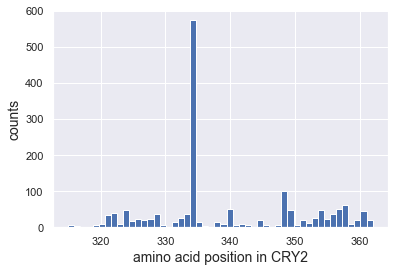

In [228]:
# Make a histogram plot; bins kwarg gives the number of bars
# again, check it is making sense...
_ = plt.hist(df_aminoacids_indexed_to_CRY.position, bins=50)
plt.xlabel('amino acid position in CRY2')
plt.ylabel('counts');

#### Another simple way to plot the frequency a mutation shows up:

Text(0.5, 1.0, 'Frequency of mutations in CRY2(535) Consitutive Screen from read1')

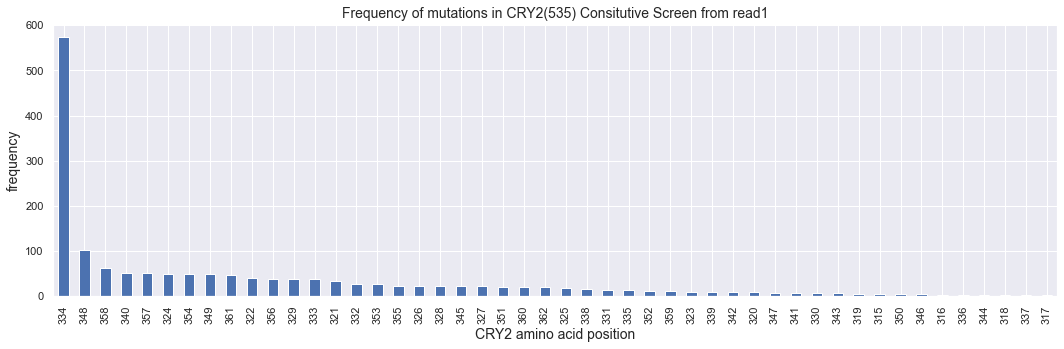

In [248]:
# plot frequency of each
df_aminoacids_indexed_to_CRY['position'].value_counts().plot.bar(figsize=(18,5))
plt.ylabel("frequency")
plt.xlabel("CRY2 amino acid position")
plt.title("Frequency of mutations in CRY2(535) Consitutive Screen from read1")

#### Take a closer look at 334 mutation.

In [252]:
df_334 = df_aminoacids_indexed_to_CRY[df_aminoacids_indexed_to_CRY['position'] == 334]

Text(0.5, 1.0, 'Frequency of various amino acid mutations at G334')

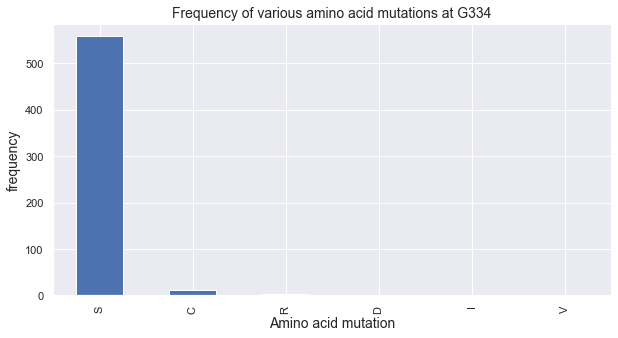

In [253]:
df_334['mutated_aa'].value_counts().plot.bar(figsize=(10,5))
plt.ylabel("frequency")
plt.xlabel("Amino acid mutation")
plt.title("Frequency of various amino acid mutations at G334")

In [256]:
df_334['mutated_aa'].value_counts()

S    558
C     11
R      2
D      1
I      1
V      1
Name: mutated_aa, dtype: int64

In [257]:
df_348 = df_aminoacids_indexed_to_CRY[df_aminoacids_indexed_to_CRY['position'] == 348]

Text(0.5, 1.0, 'Frequency of various amino acid mutations at L348')

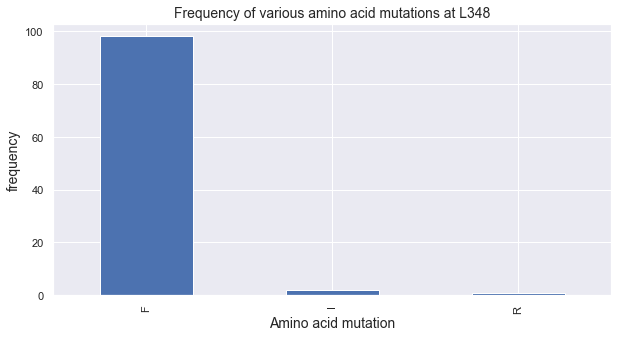

In [258]:
df_348['mutated_aa'].value_counts().plot.bar(figsize=(10,5))
plt.ylabel("frequency")
plt.xlabel("Amino acid mutation")
plt.title("Frequency of various amino acid mutations at L348")

In [259]:
df_348['mutated_aa'].value_counts()

F    98
I     2
R     1
Name: mutated_aa, dtype: int64